In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from IPython.display import HTML
import random
import re
import networkx as nx

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# nltk.download('stopwords')

conda install openpyxl

conda install streamlit

conda install networkx

Our dataset provides an extensive list of medical conditions alongside their potential symptoms, serving as a valuable resource for medical professionals, researchers, and potentially for the development of diagnostic software or educational tools. 

The dataset includes the diseases description and the recommendations for patients

In [3]:
df = pd.read_excel('symptoms.xlsx')
df_desc = pd.read_excel('symptoms.xlsx', sheet_name='symptom_Description')
df_prec = pd.read_excel('symptoms.xlsx', sheet_name='symptom_precaution')
df_sev = pd.read_excel('symptoms.xlsx', sheet_name='severity')

In [4]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


At first, we replace the whitespaces and then the '_' character by an space

In [5]:
for col in df.columns:
    if 'Symptom' in col:
        df[col] = df[col].str.replace(' ', '').str.replace('_', ' ')
cols = df.columns
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [7]:
print(f'\nPercentage NA values in dataset:\n \n{df.isna().sum() / len(df) * 100}')


Percentage NA values in dataset:
 
Disease        0.000000
Symptom_1      0.000000
Symptom_2      0.000000
Symptom_3      0.000000
Symptom_4      7.073171
Symptom_5     24.512195
Symptom_6     40.365854
Symptom_7     53.902439
Symptom_8     60.487805
Symptom_9     65.609756
Symptom_10    69.268293
Symptom_11    75.731707
Symptom_12    84.878049
Symptom_13    89.756098
Symptom_14    93.780488
Symptom_15    95.121951
Symptom_16    96.097561
Symptom_17    98.536585
dtype: float64


In [8]:
disease_unique = len(df['Disease'].unique())
print(f'Unique diseases: {disease_unique}')

print(f'\nEach disease appears:')
df['Disease'].value_counts()

Unique diseases: 41

Each disease appears:


Disease
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Aller

In summary:

* There are symptom lists for 41 different diseases/medical conditions.
* Includes a comprehensive list of 132 symptoms.
* Each disease has multiple associated symptoms, demonstrating the varied presentations of these conditions.
* Each medical condition entry has 120 rows, with different symptoms combinations into the dataset

In [9]:
styled_df = df_desc.style.set_properties(subset=['Description'], **{'width': '850px', 'text-align': 'left'})
styled_df

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.
1,Malaria,An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.
2,Allergy,"An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens."
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone."
4,Psoriasis,"Psoriasis is a common skin disorder that forms thick, red, bumpy patches covered with silvery scales. They can pop up anywhere, but most appear on the scalp, elbows, knees, and lower back. Psoriasis can't be passed from person to person. It does sometimes happen in members of the same family."
5,GERD,"Gastroesophageal reflux disease, or GERD, is a digestive disorder that affects the lower esophageal sphincter (LES), the ring of muscle between the esophagus and stomach. Many people, including pregnant women, suffer from heartburn or acid indigestion caused by GERD."
6,Chronic cholestasis,"Chronic cholestatic diseases, whether occurring in infancy, childhood or adulthood, are characterized by defective bile acid transport from the liver to the intestine, which is caused by primary damage to the biliary epithelium in most cases"
7,hepatitis A,Hepatitis A is a highly contagious liver infection caused by the hepatitis A virus. The virus is one of several types of hepatitis viruses that cause inflammation and affect your liver's ability to function.
8,Osteoarthristis,"Osteoarthritis is the most common form of arthritis, affecting millions of people worldwide. It occurs when the protective cartilage that cushions the ends of your bones wears down over time."
9,(vertigo) Paroymsal Positional Vertigo,Benign paroxysmal positional vertigo (BPPV) is one of the most common causes of vertigo ‚Äî the sudden sensation that you're spinning or that the inside of your head is spinning. Benign paroxysmal positional vertigo causes brief episodes of mild to intense dizziness.


Our recommendations dataset mentioned before is: 

In [10]:
df_prec

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,use ice to compress itching,NaN
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,GERD,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,Chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis A,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,Osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) Paroymsal Positional Vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In the following dataset, we have the weight or severity of each symptoms over each disease

In [11]:
df_sev['Symptom'] = df_sev['Symptom'].str.replace(' ', '').str.replace('_', ' ')
df_sev

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
...,...,...
128,inflammatory nails,2
129,blister,4
130,red sore around nose,2
131,yellow crust ooze,3


In [12]:
df_sev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


We can substitute each symptoms by its weight in order to try some ML models.

In [13]:
vals = df.values
symptoms_sev = df_sev['Symptom'].unique()

for i in range(len(symptoms_sev)):
    vals[vals == symptoms_sev[i]] = df_sev[df_sev['Symptom'] == symptoms_sev[i]]['weight'].values[0]
    
sev_model = pd.DataFrame(vals, columns=cols)
sev_model = sev_model.replace(np.nan, 0)
sev_model.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Checking 0 values in each columns

In [14]:
nulls = sev_model.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(nulls)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


# Analyzing the data

In [15]:
symptoms = list(df_sev['Symptom'].unique())
diseases = list(df['Disease'].unique())

In [16]:
print('There are {} symptoms described in the dataset'.format(len(symptoms)))
print('and also {} diseases described in the dataset'.format(len(diseases)))

There are 132 symptoms described in the dataset
and also 41 diseases described in the dataset


/var/folders/_m/x_6kdcg111940vvx5zz0_c7r0000gn/T/ipykernel_12580/4017346400.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(symptom_freqs.index, rotation=90, fontsize=12)


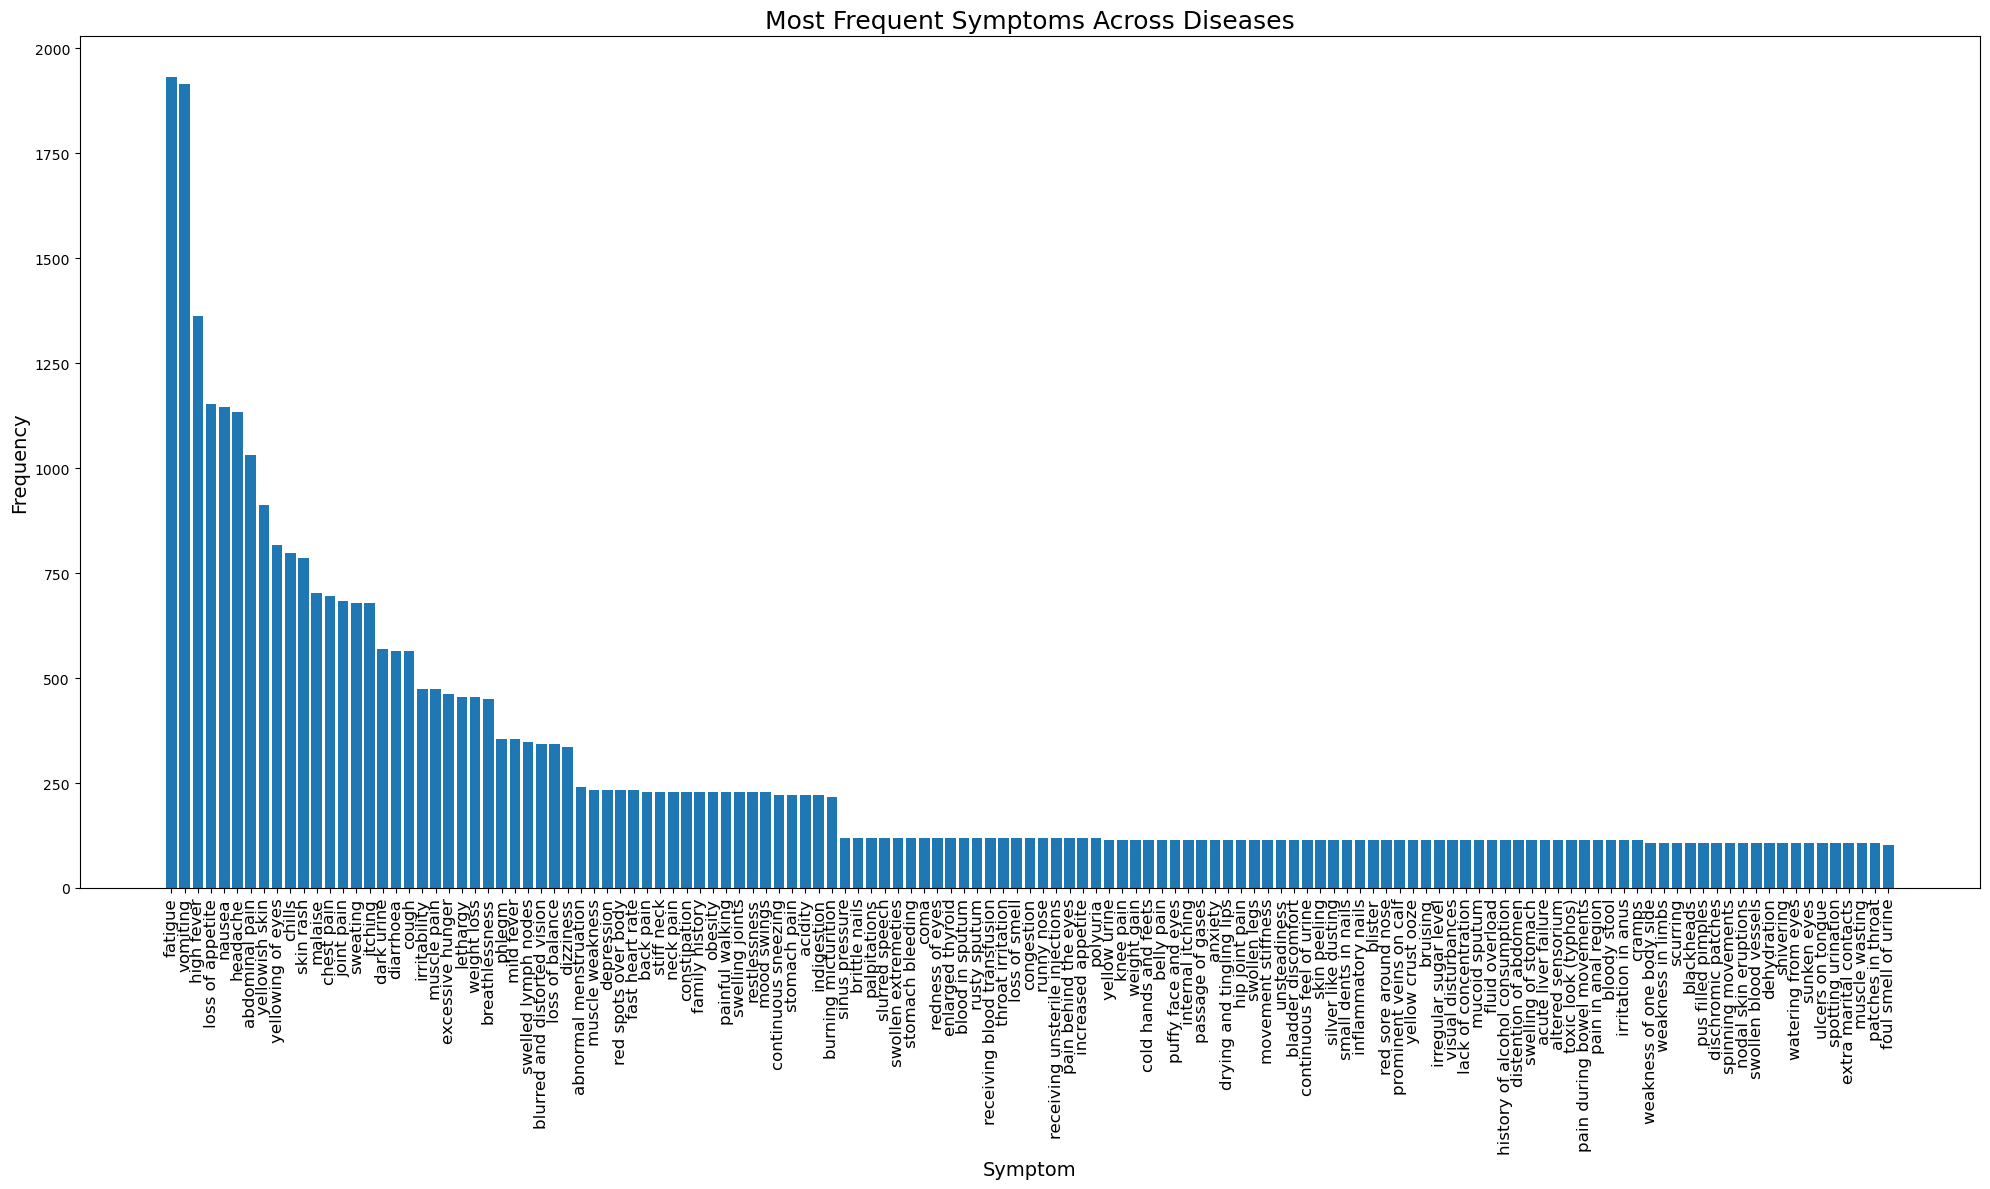

In [17]:
symptom_freqs = df.iloc[:,1:].stack().value_counts() 

plt.figure(figsize=(20,12))
plt.bar(symptom_freqs.index, symptom_freqs.values)
plt.gca().set_xticklabels(symptom_freqs.index, rotation=90, fontsize=12)

plt.title('Most Frequent Symptoms Across Diseases', fontsize=18)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Symptom', fontsize=14)

plt.tight_layout()
plt.savefig('symptom_freq.png')
plt.show()

Now, we create a matrix visualization of the relationships between the diseases and the symptoms

In [18]:
adj_mat = np.zeros((len(symptoms),len(diseases)))

for i in range(len(df)):
    for j in range(1, 18):
        disease = df.iloc[i,0]
        symptom = df.iloc[i,j]
        if pd.notnull(symptom):
            symptom = symptom.strip()  # strip leading and trailing whitespace (after and before each symptom names)
            dis_index = diseases.index(disease)
            sym_index = symptoms.index(symptom)
            adj_mat[sym_index, dis_index] += 1
        else:
            pass

This new array, adj_mat, contains the adjacency matrix where rows correspond to symptoms and columns correspond to diseases. 

Turns helpful understand the composition of this new array because our analysis will go through it.

Basically, we became our 4920 rows and 18 columns' DataFrame into an array of 41 columns (one for each medical condition) and 132 rows with the sum of how many times each symptoms are associated the disease with

In [19]:
print(adj_mat.shape)

(132, 41)


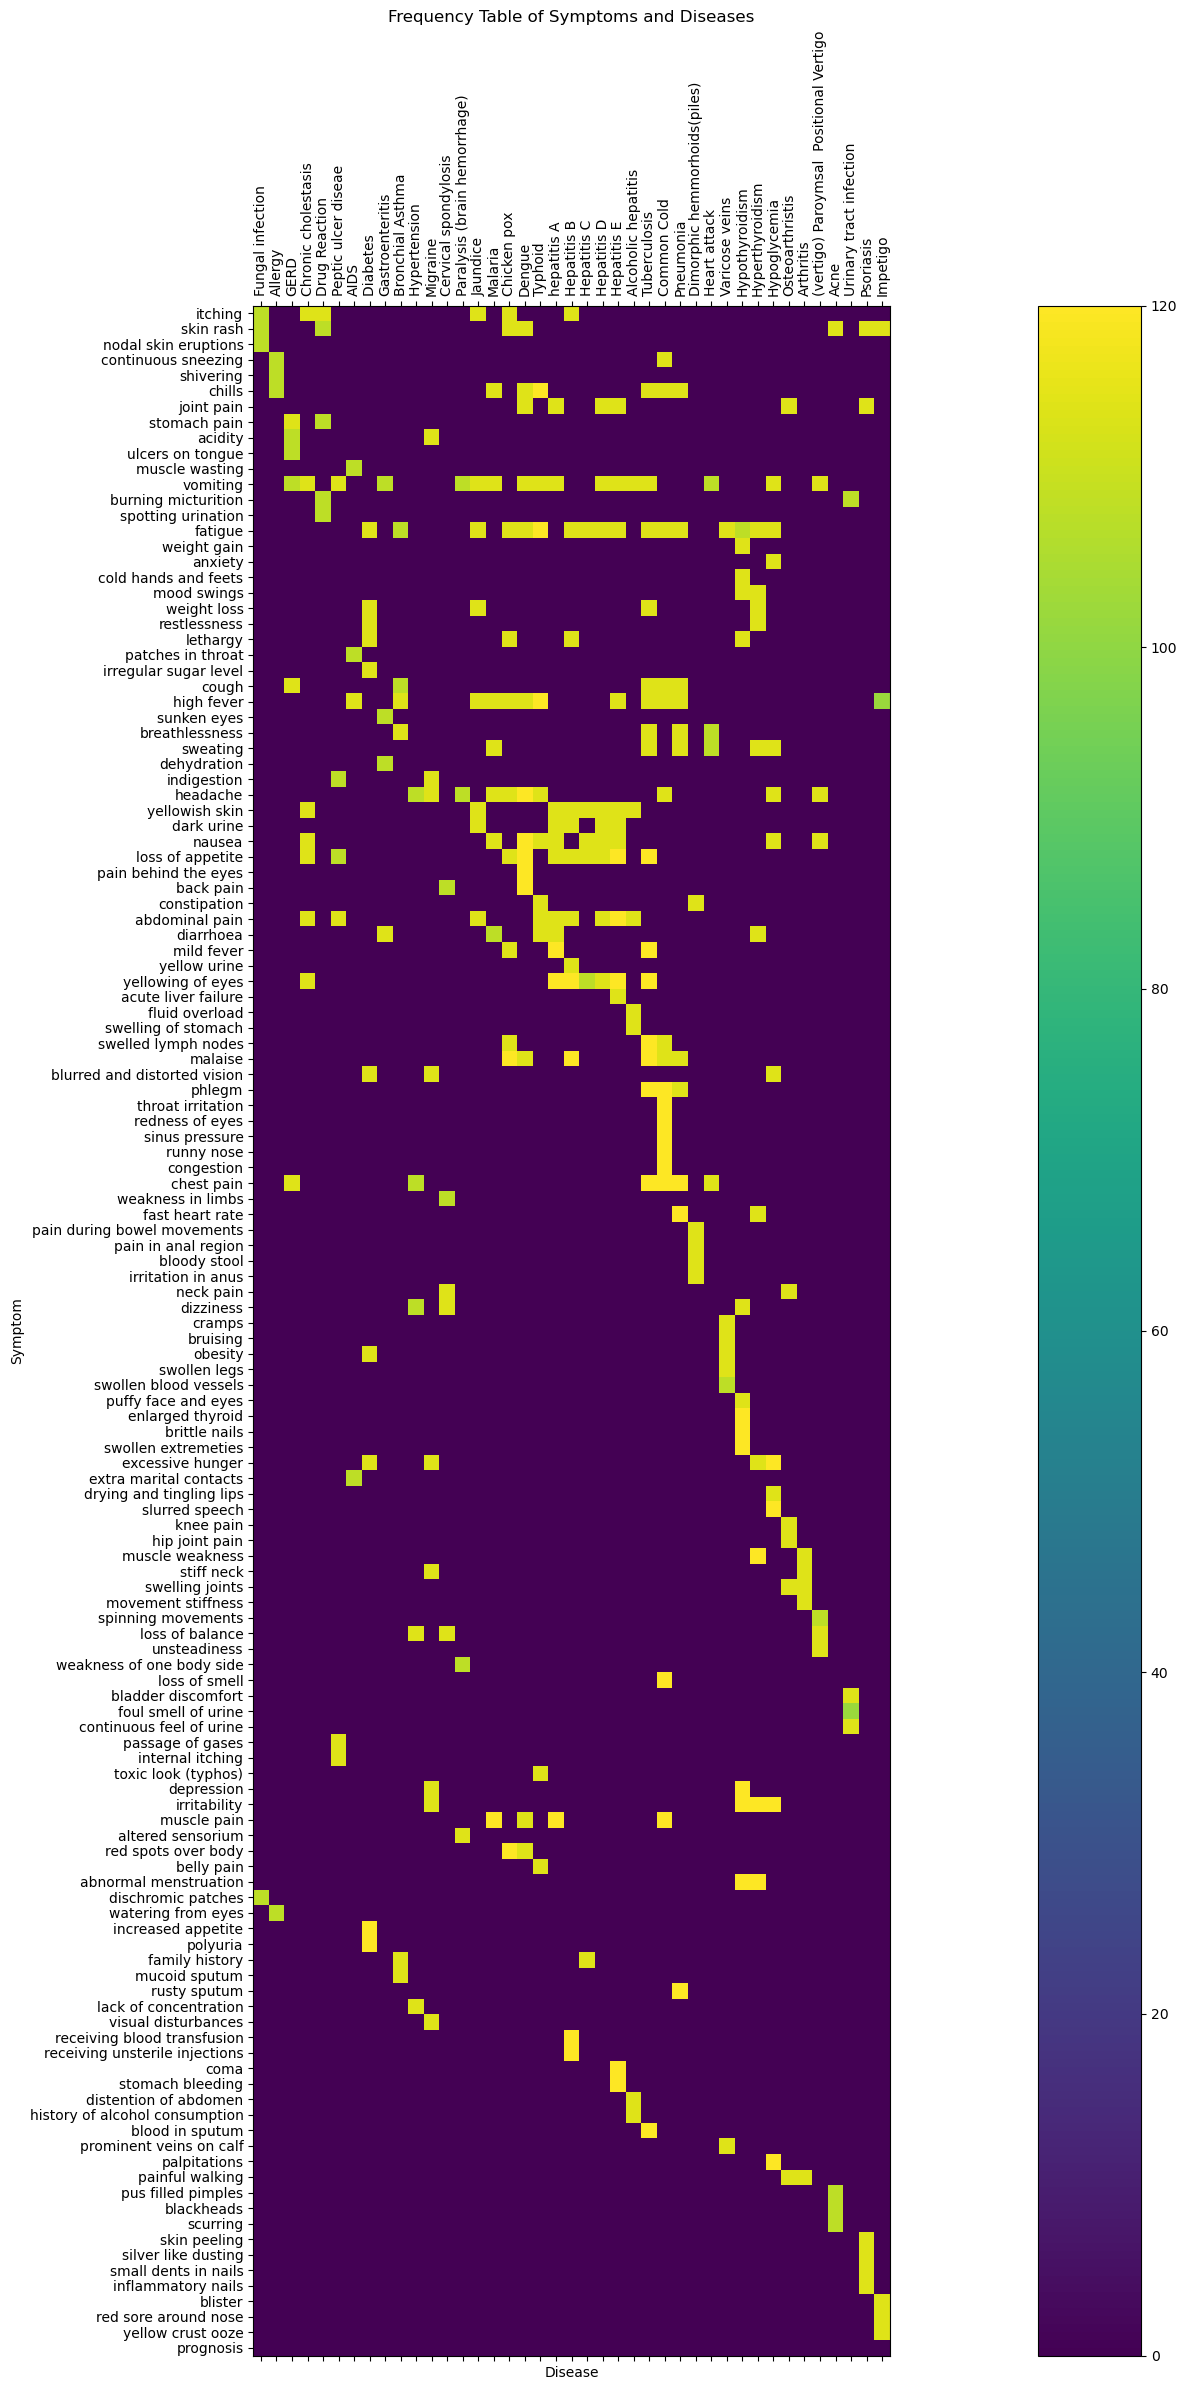

In [20]:
fig = plt.figure(figsize=(30,24))
ax = fig.add_subplot()

max_value = adj_mat.max()
norm = colors.Normalize(vmin=0, vmax=max_value)

cax = ax.matshow(adj_mat, cmap='viridis', norm=norm)
fig.colorbar(cax)

ax.set_xticks(range(len(diseases)))
ax.set_xticklabels(diseases, rotation=90)
ax.set_yticks(range(len(symptoms)))
ax.set_yticklabels(symptoms)

ax.set_title('Frequency Table of Symptoms and Diseases')
ax.set_xlabel('Disease')
ax.set_ylabel('Symptom')

plt.tight_layout()
plt.show()

Each cell in the matrix corresponds to the frequency of a symptom for a specific disease.

Lighter cells indicate a higher frequency of a symptom associated with a disease, meanwhile darker cells indicate a lower frequency or absence of that symptom for a particular disease. 

The overall pattern could help in identifying which symptoms are commonly shared among medical conditions, which are unique, and possibly the relationships between diseases based on symptom overlap.

# Naives Bayes Classifier

It is a machine learning algorithm that relies on Bayes' theorem to perform precitions and classifications.

* This theorem relates the probability of an event to prior information.
* They assume predictors are independent from each other. This simplifies the calculations ***Disadvantages***
* They are very fast compared to other more complex algorithms.
* They work well in classification problems with high number of variables.
* They are used in applications like spam filtering, medical diagnosis, text mining, etc.

In summary, Bayesian classifiers predict the probability that a data point belongs to a certain category, based on probability calculations and Bayes' theorem. They are simple yet effective algorithms for classification tasks.

Pros:

* Simple and fast to train. Only requires small dataset to estimate parameters.
* Performs well with high dimensional data.
* Handles missing values and outliers in data.
* Outputs probabilistic predictions, which provide a level of certainty.
* Useful for a wide range of prediction and classification tasks.

Cons:

* Assumes predictor variables are independent, which is often not true in real data.
* Can suffer from overfitting if too many features exist and dataset is small.
* Doesn't perform as well as discriminative models like SVM for some problems.
* Prior knowledge about distributions is required, which is not always available.
* Doesn't work well with continuous variables, discretization is required.
* Predictions can be sensitive to choice of priors.

In general, Bayesian classifiers work very well for certain types of problems, like text classification and spam filtering. The probabilistic outputs are very useful. However, their assumption of variable independence limits them in some domains. Overall, a powerful set of algorithms for many applications.

### Naive Bayes Variants

* Gaussian Naive Bayes: Assumes a multivariate Gaussian distribution
* Multinomial Naive Bayes: Assumes a multinomial distribution.
* Bernoulli Naive Bayes: Assumes a multivariate Bernoulli distribution (there can be multiple features, but each one is assumed to be a binary (Bernoulli, boolean) variable).

![Image](img/naive_bayes.PNG)

### Naive Bayes Gaussiano

In this classifier, the assumption is that the data for each label is drawn from a multivariate Gaussian distribution where the features are independent of each other.

![Image](img/gaussian-NB.png)

### Naive Bayes Multinomial

In this classifier it is assumed that the features have a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among multiple categories and therefore multinomial naive bayes is more suitable for features representing counts or count rates.

The idea is exactly the same as before, except that instead of modeling the data distribution with the best fitting Gaussian distribution, we model the data distribution with the best fitting multinomial distribution.

### Naive Bayes Bernoulli

The features are independent booleans (binary variables) that describe the input data.

# References 

All about Naive Bayes

https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf

Wines type and quality classification exercises

https://www.kaggle.com/mgmarques/wines-type-and-quality-classification-exercises

Naive Bayes Classifier Explained

https://towardsdatascience.com/naive-bayes-classifier-explained-54593abe6e18  

# The Models

In [21]:
X = sev_model.drop(['Disease'], axis=1)
Y = sev_model['Disease']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8,random_state=123)
print("Training set size:")
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)

print("\nTesting set size:")
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

Training set size:
X_train: (3936, 17)
Y_train: (3936,)

Testing set size:
X_test: (984, 17)
Y_test: (984,)


### Naives Bayes Gaussiano

In [23]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [24]:
# Prediction and accuracy
Y_pred = gnb.predict(X_test)
print(f'The Naives Bayes Gaussiano accuracy is: {round(accuracy_score(Y_test, Y_pred), 2)}')

The Naives Bayes Gaussiano accuracy is: 0.88


### Naives Bayes Multinomial

In [25]:
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)

MultinomialNB()

In [26]:
# Prediction and accuracy
Y_pred = mnb.predict(X_test)
print(f'The Naives Bayes Multinomial accuracy is: {round(accuracy_score(Y_test, Y_pred), 2)}')

The Naives Bayes Multinomial accuracy is: 0.55


### Naive Bayes Bernoulli

In [27]:
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)

BernoulliNB()

In [28]:
# Prediction and accuracy
Y_pred = bnb.predict(X_test)
print(f'The Naives Bayes Bernoulli accuracy is: {round(accuracy_score(Y_test, Y_pred), 2)}')

The Naives Bayes Bernoulli accuracy is: 0.19


## The Classifier

In [29]:
non_diagnosis_responses = ['I cannot give you a possible diagnosis','Please, try it again','Please, give me more details','I do not understand what you mean']

def bayesian_classifier(adj_mat, symptom_list, symptoms, diseases):
    
    # Use re.sub() to remove the special characters from each symptom in the symptom_list
    cleaned_symptom_list = [re.sub(r'[:;¿?¡!-]', '', s).strip().lower() for s in symptom_list]

    # Convert the cleaned symptom list to indices, assuming the symptoms are found in the cleaned list
    sym = [symptoms.index(s) for s in cleaned_symptom_list if s in symptoms]

    # sym = [symptoms.index(s) for s in symptom_list]
    p_dis = adj_mat.sum(axis=0) / adj_mat.sum()
    p_sym = adj_mat.sum(axis=1) / adj_mat.sum()
    dist = []

    for i in range(len(diseases)):
        # computing the bayes probability
        prob = np.prod((adj_mat[:,i] / adj_mat[:,i].sum())[sym]) * p_dis[i] / np.prod(p_sym[sym])
        dist.append(prob)
    
    if sum(dist) == 0:
        return non_diagnosis_responses[random.randrange(4)]
    else:
        idx = dist.index(max(dist))
        return diseases[idx]

It is necessary to clarify some aspects of this function when you have a list of symptoms:

* p_dis: This computes the prior probability of each disease by summing over the symptoms for each disease and then dividing by the total counts of all symptoms for all diseases.

* p_sym: This computes the prior probability of each symptom by summing over all diseases for each symptom and then dividing by the total counts.

* Whether the dist is zero, it means that the function loops through all possible diseases did not find a correct value (disease).

* This function selects the disease with the highest probability as the most likely diagnosis given the symptoms.

It means that if you have three symptoms and there are at least two diseases that could corresponds to those symptoms, the function will return the one with the greatest calculated probability.

This probability is not just based on how well the symptoms match the disease, but also on how common the disease is prioritized and how common the symptoms are.

In [30]:
def print_precautions(diseases, df_prec):

    precautions = df_prec[df_prec['Disease'].str.lower() == diseases.lower()].iloc[0]
    print('Recommended precautions:')
    for i in range(1, 5):
        print(f"- {precautions[f'Precaution_{i}']}")

This function brings the recommendation based on the disease that we found

In [31]:
def print_description(disease, df_desc):

    desc = df_desc['Disease'].str.lower() == disease.lower()
    if desc.any():
        description = df_desc.loc[desc, 'Description'].iloc[0]
        print(f'{description}\n')
    else:
        ''

This function brings a brief description of the the disease found

# Network Graph

For visualizations matters, we plot only twelve diseases

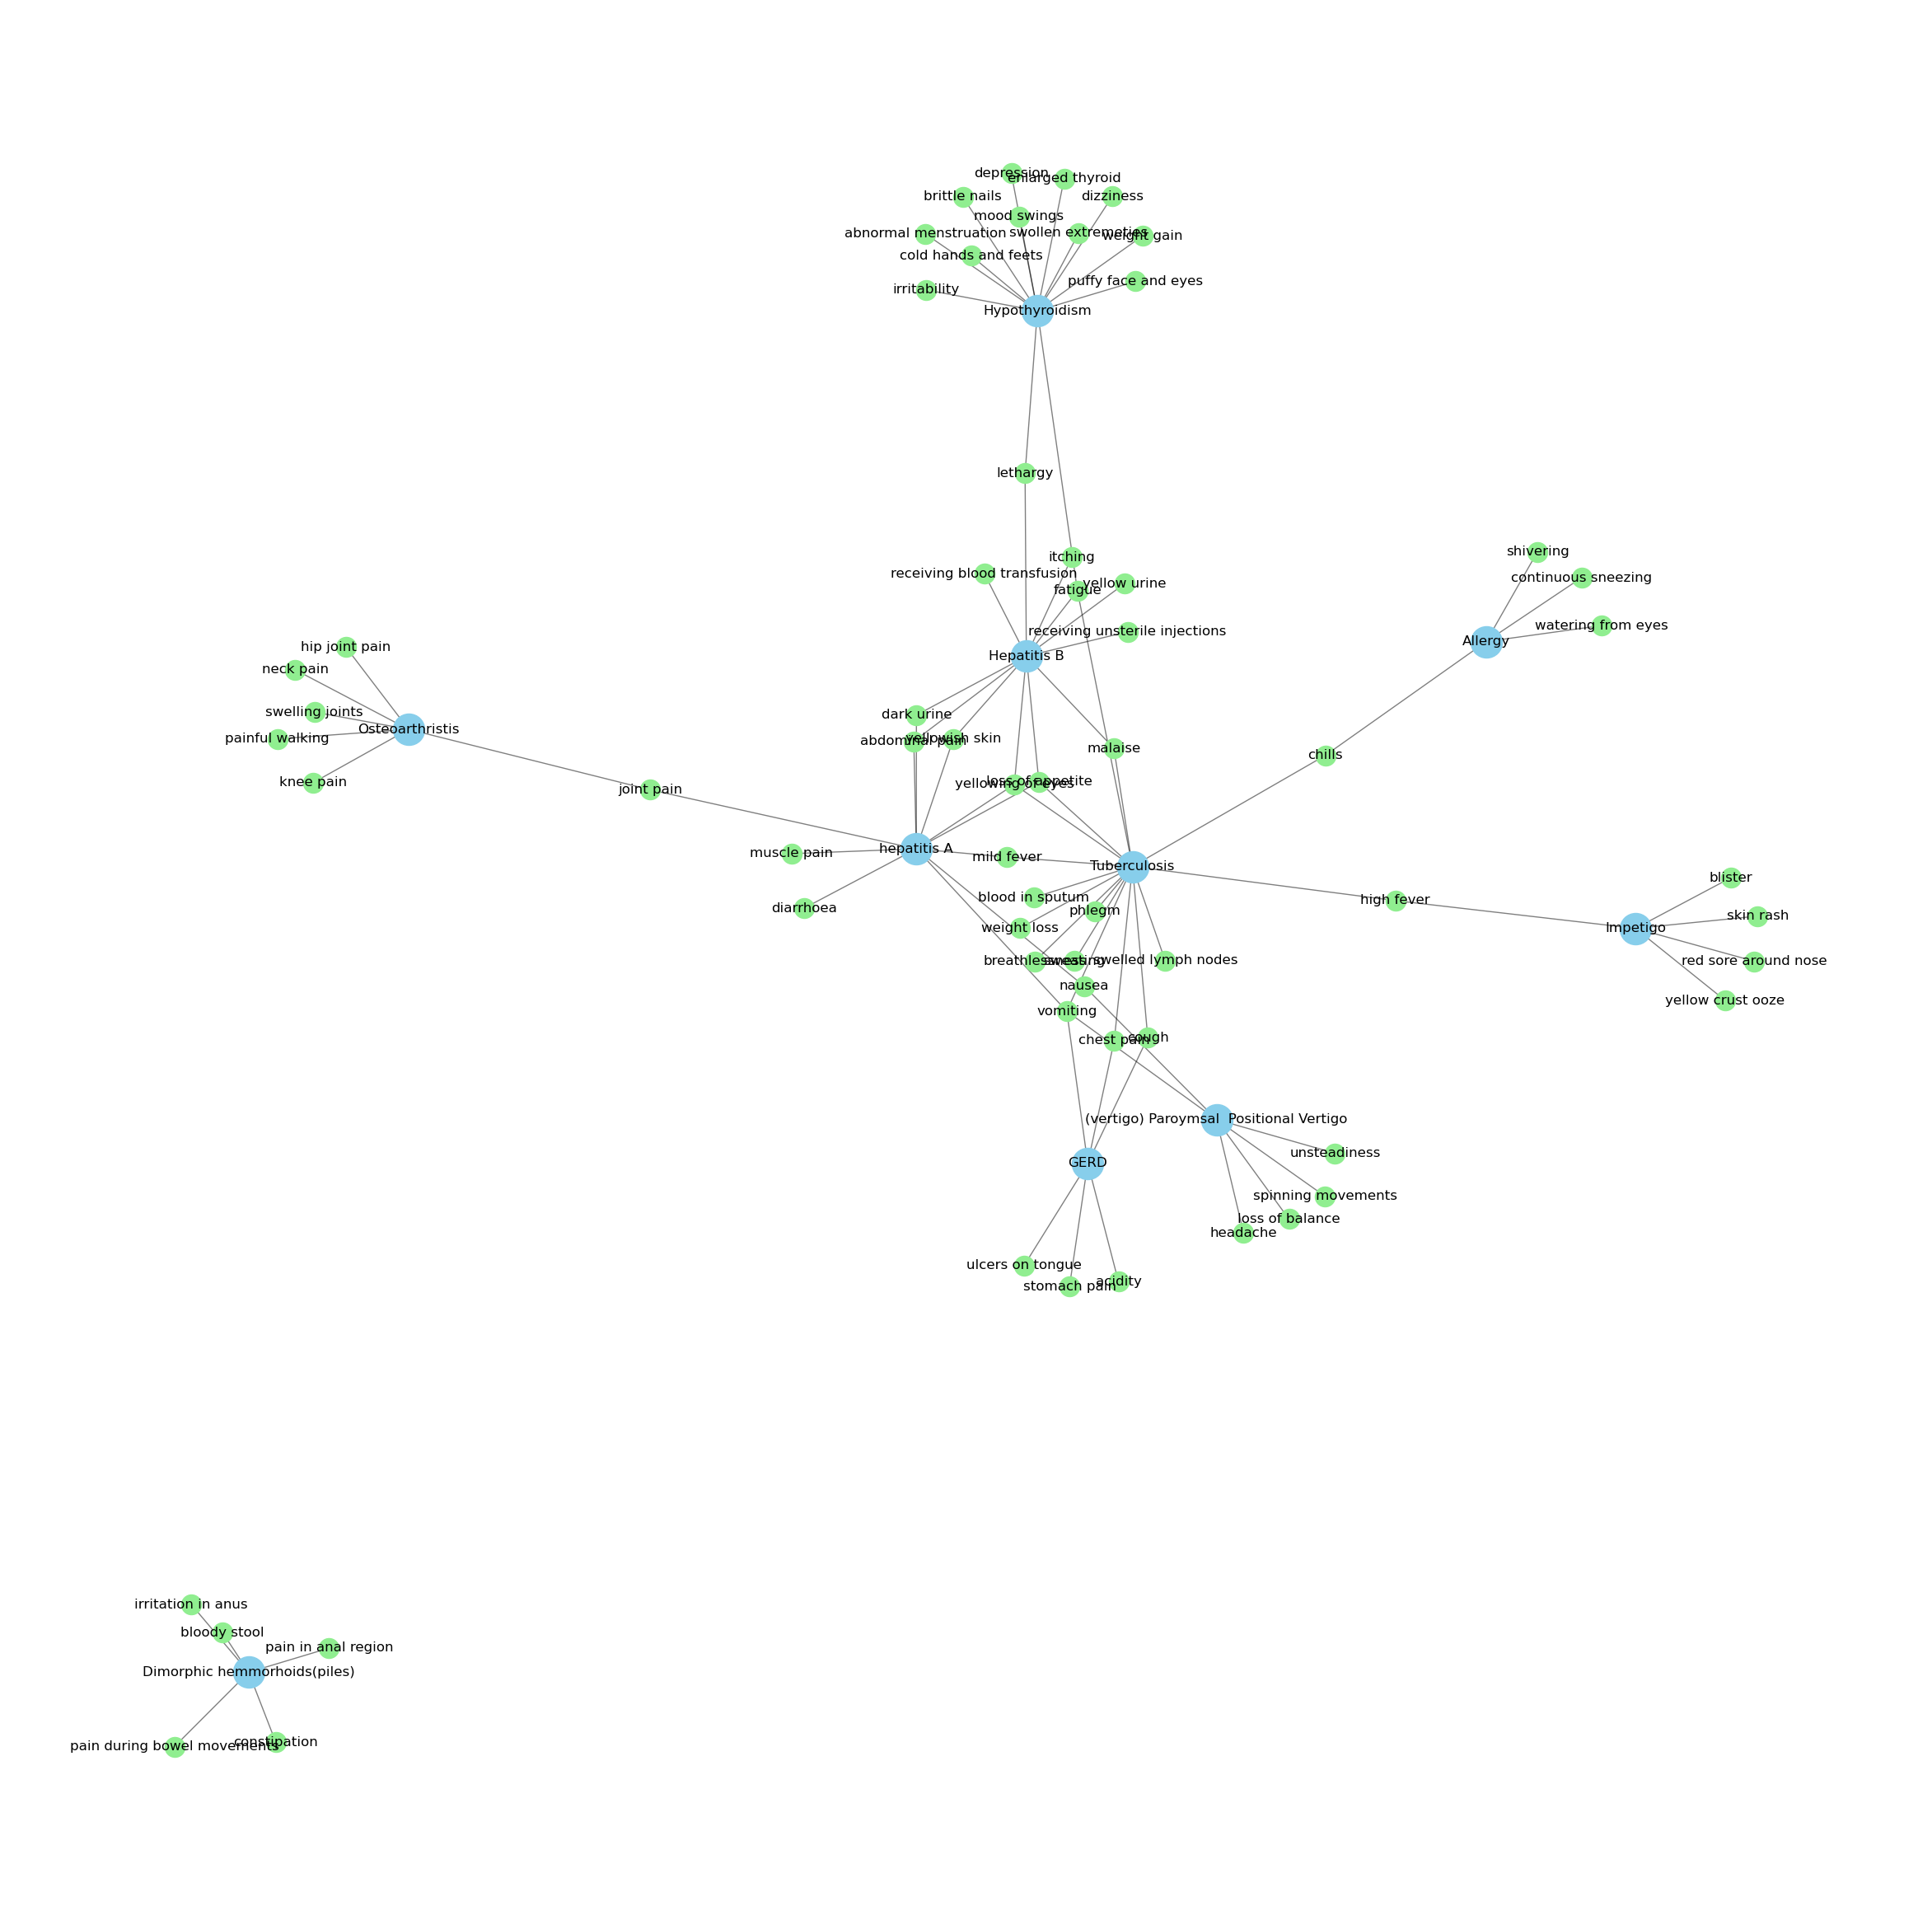

In [32]:
random_diseases = random.sample(list(diseases), 10) 
df_random = df.copy()
df_random = df_random[df_random['Disease'].isin(random_diseases)]

# Create a graph
G = nx.Graph()

# Add nodes and edges
for index, row in df_random.iterrows():
    disease = row['Disease']
    G.add_node(disease, type='disease')

    # Assuming that your dataframe has multiple symptom columns
    for symptom in row[1:]:
        if not pd.isnull(symptom):
            G.add_node(symptom, type='symptom')
            G.add_edge(disease, symptom)

# Draw the graph
plt.figure(figsize=(30,30))
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=750, node_color="skyblue", 
                       nodelist=[node for node in G.nodes if G.nodes[node]['type'] == 'disease'])
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightgreen", 
                       nodelist=[node for node in G.nodes if G.nodes[node]['type'] == 'symptom'])

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# labels
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()

## 1. How the Model works

We can add manually each symptoms

In [33]:
diagnosed_disease = bayesian_classifier(adj_mat, ['fatigue', 'mood swings'], symptoms, diseases)

# Print out the precautions for the diagnosed disease
if diagnosed_disease not in non_diagnosis_responses:
    print(f'{diagnosed_disease}\n')
    print_precautions(diagnosed_disease, df_prec)
else:
    print(diagnosed_disease)

Hyperthyroidism

Recommended precautions:
- eat healthy
- massage
- use lemon balm
- take radioactive iodine treatment


In [34]:
diagnosed_disease = bayesian_classifier(adj_mat, ['fatigue', 'moodswings'], symptoms, diseases)

# Print out the precautions for the diagnosed disease
if diagnosed_disease not in non_diagnosis_responses:
    print(f'{diagnosed_disease}\n')
    print_precautions(diagnosed_disease, df_prec)
else:
    print(diagnosed_disease)

Typhoid

Recommended precautions:
- eat high calorie vegitables
- antiboitic therapy
- consult doctor
- medication


In [35]:
diagnosed_disease = bayesian_classifier(adj_mat, ['fatigue', 'mood swings', 'stomach pain', 'acidity'], symptoms, diseases)

# Print out the precautions for the diagnosed disease
if diagnosed_disease not in non_diagnosis_responses:
    print(f'{diagnosed_disease}\n')
    print_precautions(diagnosed_disease, df_prec)
else:
    print(diagnosed_disease)

I cannot give you a possible diagnosis


In [36]:
diagnosed_disease = bayesian_classifier(adj_mat, ['ulcers on tongue'], symptoms, diseases)

# Print out the precautions for the diagnosed disease
if diagnosed_disease not in non_diagnosis_responses:
    print(f'{diagnosed_disease}\n')
    print_precautions(diagnosed_disease, df_prec)
else:
    print(diagnosed_disease)

GERD

Recommended precautions:
- avoid fatty spicy food
- avoid lying down after eating
- maintain healthy weight
- exercise


In [37]:
diagnosed_disease = bayesian_classifier(adj_mat, ['acidity','continuous sneezing'], symptoms, diseases)

# Print out the precautions for the diagnosed disease
if diagnosed_disease not in non_diagnosis_responses:
    print(f'{diagnosed_disease}\n')
    print_precautions(diagnosed_disease, df_prec)
else:
    print(diagnosed_disease)

I cannot give you a possible diagnosis


## 2. How the Chatbot would be

Using input() function, having to choose symptoms inside the list our 132 symptoms

In [39]:
int(input()) + 3

8

In [40]:
print('Please enter your symptoms separated by commas from the list below:\n')

# Get user input and process it
user_input = input('Enter symptoms: ')
# remove this special characters r'''[.:;¿?¡!'"=+/\[\]{}()`~@$%^&*\d|]'''
cleaned_input = re.sub(r'''[.:;¿?¡!\<>'"=+/\[\]{}()`~@$%^&*|\d\\]''', '', user_input)
cleaned_input = cleaned_input.replace('_', ' ').replace('-', ' ')
user_symptoms = [sym.strip() for sym in cleaned_input.split(',') if sym.strip() in symptoms]

# Check if the user entered symptoms that are in the list
if not user_symptoms:
    non_diagnosis_responses[random.randrange(4)]
else:
    # Call the bayesian_classifier function
    diagnosis = bayesian_classifier(adj_mat, user_symptoms, symptoms, diseases)
    print(f'\n{user_symptoms}')
    print(f'\nThe most likely diagnosis is: {diagnosis}\n')
    print_description(diagnosis, df_desc)
    print_precautions(diagnosis, df_prec)

# I have an continuous sneezing', fatigue"!?, and high fever!
# continuous sneezing,shivering, chills,
# diarrhoea, vomiting
# for Psoriasis: skin rash, joint pain, skin peeling, silver like dusting

Please enter your symptoms separated by commas from the list below:


['continuous sneezing', 'shivering', 'chills']

The most likely diagnosis is: Allergy

An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens.

Recommended precautions:
- apply calamine
- cover area with bandage
- nan
- use ice to compress itching
